In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the data**

In [3]:
file_path = '/content/drive/My Drive/Projects/CustomerSegment/data.csv'
df=pd.read_csv(file_path,encoding='unicode_escape')

**Understand the DataFrame**

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

**Use RFM techniques to segment customer </br>
Recency - Frequency - Monetary**

***Recency***

In [7]:
#convert date column to datetime format
df['Date']=pd.to_datetime(df['InvoiceDate']).fillna(pd.to_datetime('1999-12-31'))

In [8]:
df1=df.dropna(subset=['CustomerID'])

In [9]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00


In [10]:
#keep only the most recent date of purchase
df1['rank']=df1.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = df1[df1['rank']==1]

<ipython-input-10-313bd9d42974>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rank']=df1.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)


In [11]:
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1


In [12]:
#Compute the number of days that each date compared to the latest date - Put into the 'recency' column
df_rec['recency']=(df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

<ipython-input-12-0097cf38afbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency']=(df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [13]:
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0


***Frequency***

In [14]:
freq = df_rec.groupby('CustomerID')['Date'].count()
df_freq=pd.DataFrame(freq).reset_index()
df_freq.columns=['CustomerID','frequency']
df_freq

,CustomerID,frequency
0,12346.0,1
1,12347.0,31
2,12348.0,17
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,7
4370,18283.0,57


In [15]:
rec_freq = df_freq.merge(df_rec, on='CustomerID')

In [16]:
rec_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6


***Monetary Value***

In [17]:
rec_freq['total']=rec_freq['Quantity']*df['UnitPrice']

In [18]:
m = rec_freq.groupby('CustomerID')['total'].sum()

In [19]:
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']

In [20]:
rfm = m.merge(rec_freq,on='CustomerID')

In [21]:
finaldf = rfm[['CustomerID','recency','frequency','monetary_value']]

In [22]:
finaldf.head()

,CustomerID,recency,frequency,monetary_value
0,12346.0,48,1,189248.25
1,12347.0,6,31,1246.73
2,12347.0,6,31,1246.73
3,12347.0,6,31,1246.73
4,12347.0,6,31,1246.73


**Removing Outliers**

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
list1=['recency','frequency','monetary_value']

Visualize the distribution of RFM scores to detect the outliers

recency: 


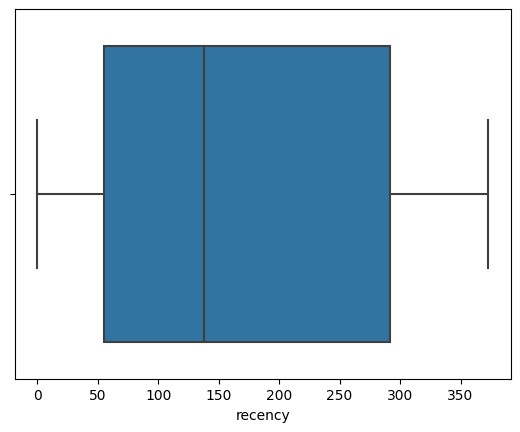

frequency: 


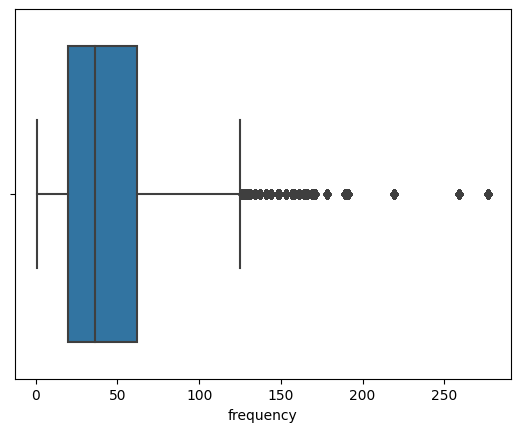

monetary_value: 


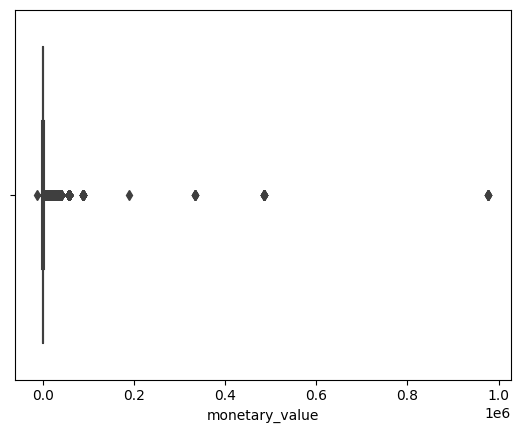

In [25]:
for i in list1:
  print(str(i)+': ')
  ax = sns.boxplot(x=finaldf[str(i)])
  plt.show()

In [26]:
from scipy import stats
import numpy as np

In [27]:
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]

In [28]:
#remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores=np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df=new_df[filtered_entries]
#note: filtered_entries will give True if all the columns is <3 and False if one of three columns is > 3

In [29]:
new_df.head()

,recency,frequency,monetary_value
1,6,31,1246.73
2,6,31,1246.73
3,6,31,1246.73
4,6,31,1246.73
5,6,31,1246.73


**Standardization**

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
new_df = new_df.drop_duplicates()
col_names = ['recency','frequency','monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [32]:
scaled_features.head()

,recency,frequency,monetary_value
0,-1.196723,0.379971,0.185080
1,-1.120665,-0.259085,1.965919
2,1.752654,2.297138,0.401256
3,-0.715020,-0.259085,-0.217826
4,-0.596706,-0.350378,0.011294


**KMeans Clustering**

In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [34]:
SSE = []
for cluster in range(1,10):
  kmeans = KMeans(n_clusters=cluster, init='k-means++')
  kmeans.fit(scaled_features)
  SSE.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [35]:
SSE

[13058.999999999987,
 9413.935151258927,
 6733.322357425032,
 4970.045714802629,
 4250.357451673866,
 3615.1109082042976,
 3165.4162547655105,
 2791.864422367227,
 2562.3529358287033]

Text(0, 0.5, 'Inertia')

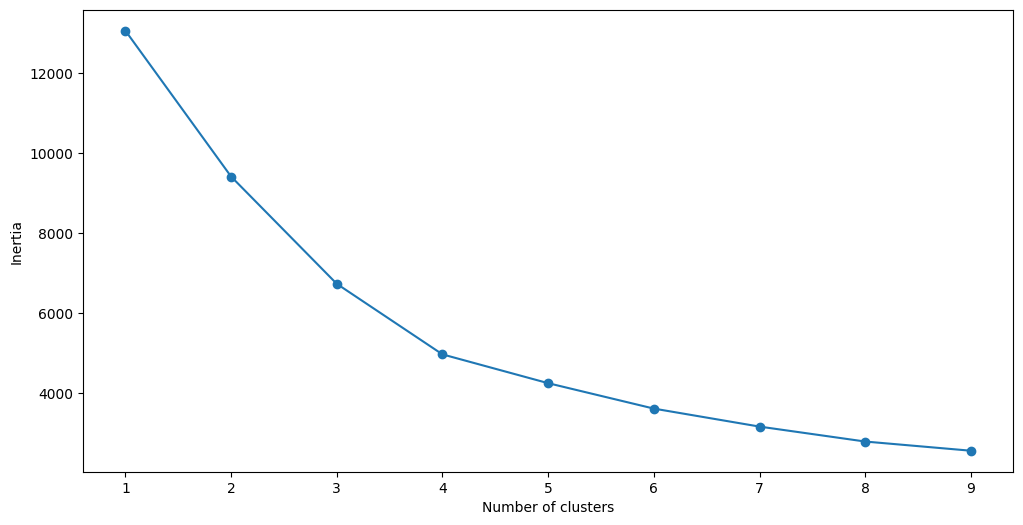

In [36]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The 'elbow' of this graph is the point of inflection on the curve, and in this case is at the 4-cluster mark.

In [37]:
#Build a model with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

Use **the silhouette score** to evaluate the performace of this model. This is a coefficient value that ranges from -1 to +1. A higher silhouette score is indivative of a better model.

In [38]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.43600059110868045


**Visualization**

In [39]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['Cluster']=pred

In [40]:
pred

array([1, 1, 2, ..., 0, 2, 0], dtype=int32)

In [41]:
frame

,recency,frequency,monetary_value,Cluster
1,6,31,1246.73,1
32,15,17,4311.90,1
49,355,73,1618.81,2
122,63,17,553.25,1
139,77,15,947.61,1
...,...,...,...,...
100700,96,10,229.79,1
100710,193,7,92.29,0
100717,247,7,159.91,0
100724,36,57,201.54,2


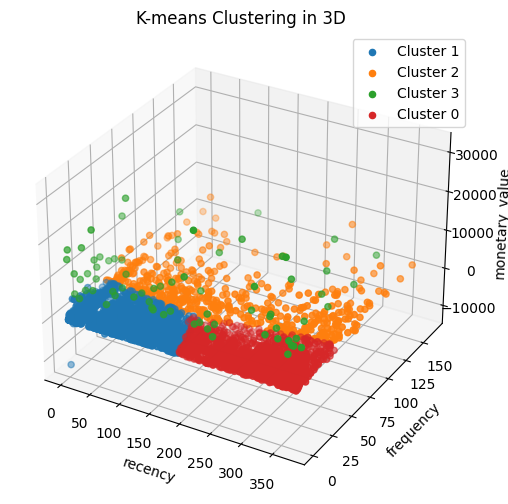

In [42]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in frame['Cluster'].unique():
    cluster_data = frame[frame['Cluster'] == cluster]
    ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary_value'], label=f'Cluster {cluster}')

ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary_value')
ax.set_title('K-means Clustering in 3D')

plt.legend()
plt.show()

In [43]:
avg_df = frame.groupby(['Cluster'], as_index=False).mean()

In [44]:
avg_df

,Cluster,recency,frequency,monetary_value
0,0,281.519176,18.840199,728.417940
1,1,64.789496,15.055042,568.916324
2,2,163.079268,69.193089,1804.551301
3,3,160.630137,31.602740,10587.056575


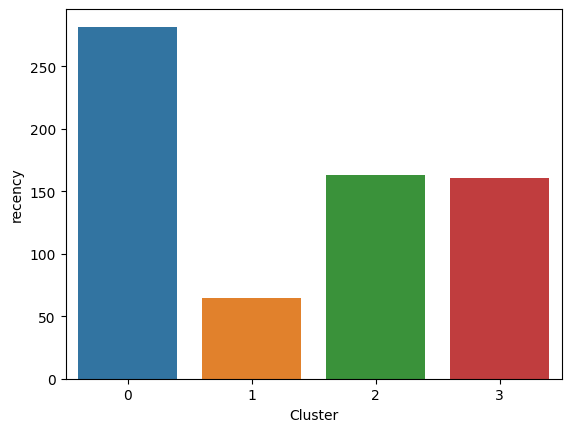

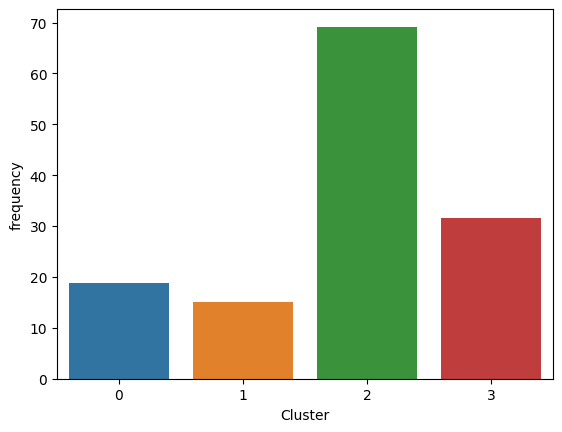

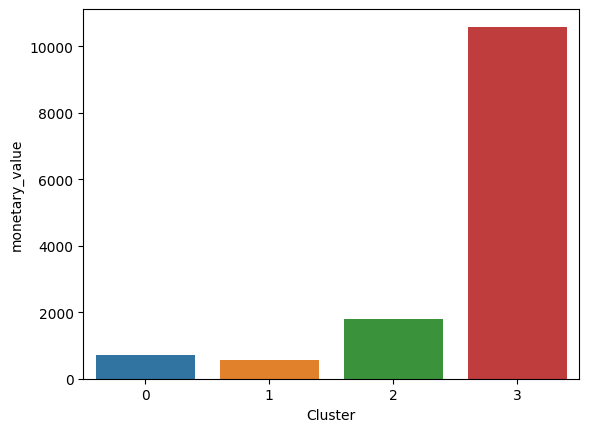

In [45]:
for i in list1:
  sns.barplot(x='Cluster', y=str(i),data=avg_df)
  plt.show()

**Interpretation**



*   Cluster 2: **High-Value Segment** </br>
  This segment has moderate recency (160.63), moderate frequency (31.60) and high monetary value (10,587.06). </br>
  These customers have made recent and frequent purchases, and they contribute significantly to revenue.
*   Cluster 0: **Potential Loyalists** </br>
  This segment has moderate recency (163.08), high frequency (69.19) and a relatively high monetary value (1,804.55). </br>
  While not as high in monetary value as High-Value group, these customers are still valuable due to their frequency and recent activity.
*   Cluster 1: **At-Risk Customers** </br>
  This cluster has high recency (281.52), low frequency (18.84) and a moderate monetary value (728.42). </br>
  These customers have not made recent purchases and have a lower frequency, indicating a potential decline in engagement.
*   Cluster 3: **Low-Value Segment** </br>
  This segment has low recency (64.79), low frequency (15.06), and a moderate monetary value (568.92).
 </br>
  These customers are not active in terms requency, and they contribute less to overall revenue.
  



**Implementation** </br>
I generate a table that identify which segment the customer belong to.

In [46]:
df_merge=pd.merge(frame,finaldf, left_index=True, right_index=True, how='inner')
cust_seg=df_merge[['CustomerID','Cluster']].copy()
cust_seg

,CustomerID,Cluster
1,12347.0,1
32,12348.0,1
49,12349.0,2
122,12350.0,1
139,12352.0,1
...,...,...
100700,18280.0,1
100710,18281.0,0
100717,18282.0,0
100724,18283.0,2


In [50]:
import numpy as np
conditions = [
    (cust_seg['Cluster'] == 0),
    (cust_seg['Cluster'] == 1),
    (cust_seg['Cluster'] == 2),
    (cust_seg['Cluster'] == 3)
]

choices = ['At-Risk Customer','Low-Value Segment','Potential Loyalist', 'High-Value Segment' ]

cust_seg['Segment'] = np.select(conditions, choices, default='other')

In [51]:
cust_seg.head()

,CustomerID,Cluster,Segment
1,12347.0,1,Low-Value Segment
32,12348.0,1,Low-Value Segment
49,12349.0,2,Potential Loyalist
122,12350.0,1,Low-Value Segment
139,12352.0,1,Low-Value Segment


In [52]:
# Export the Customer Segmentation DataFrame to the .csv file
cust_seg.to_csv('/content/drive/My Drive/Projects/CustomerSegment/output_segment.csv', index=False)